
# CODE TO DETECT CREDIT CARD FRAUD DETECTION USING NAIVE BAYES




# STEP #1: LIBRARIES IMPORT


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
%matplotlib inline

# STEP #2: IMPORT DATASET

In [124]:
data = pd.read_csv("loan.csv")

In [125]:
data.isnull().sum()
data = data.dropna()
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [126]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


# STEP #3: VISUALIZE DATASET

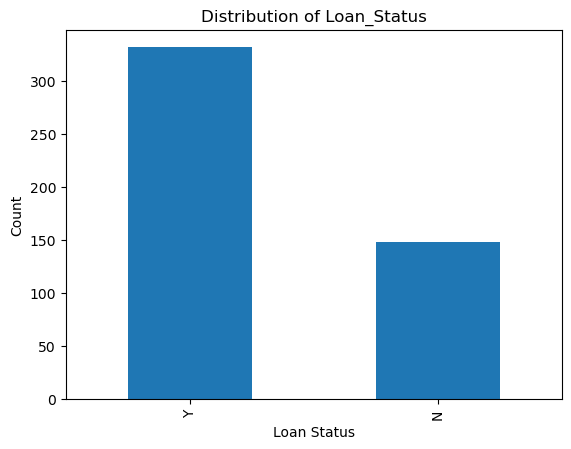

In [128]:
data['Loan_Status'].value_counts().plot(kind='bar')
plt.title('Distribution of Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


Gender
Male      394
Female     86
Name: count, dtype: int64


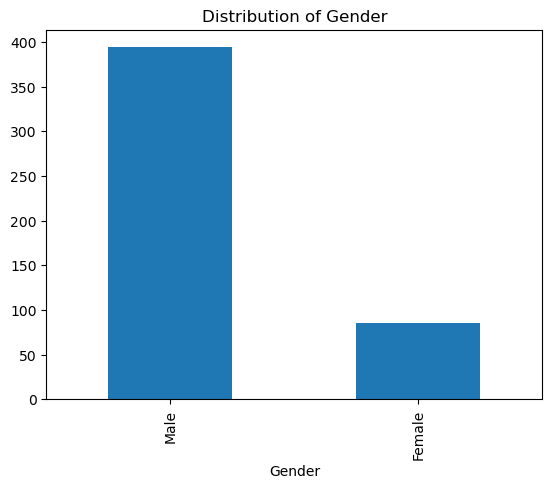

Married
Yes    311
No     169
Name: count, dtype: int64


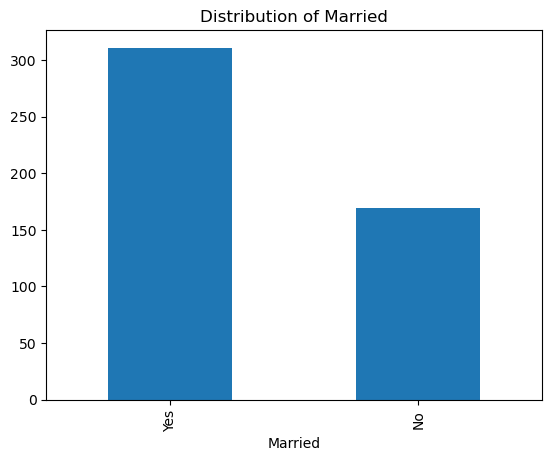

Education
Graduate        383
Not Graduate     97
Name: count, dtype: int64


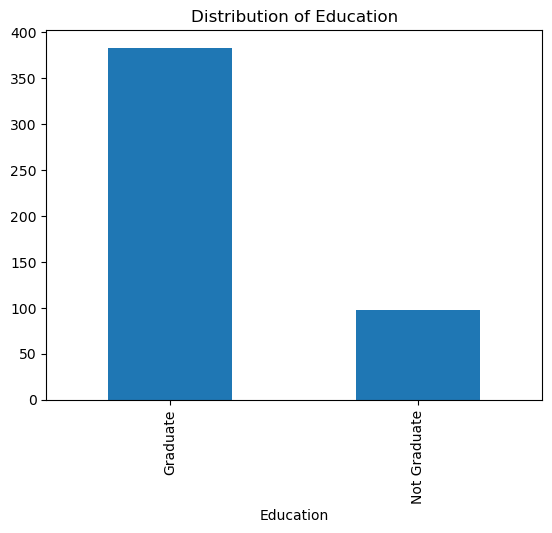

Self_Employed
No     414
Yes     66
Name: count, dtype: int64


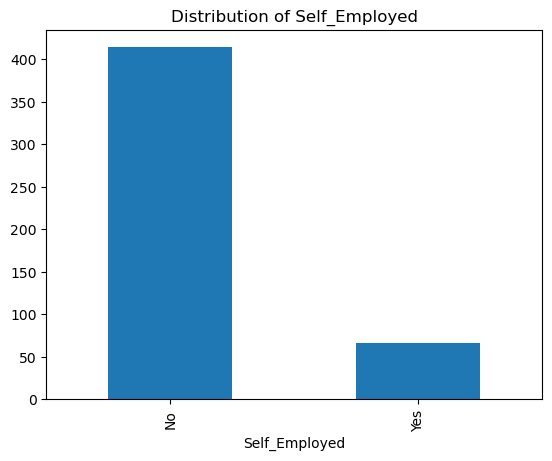

Property_Area
Semiurban    191
Urban        150
Rural        139
Name: count, dtype: int64


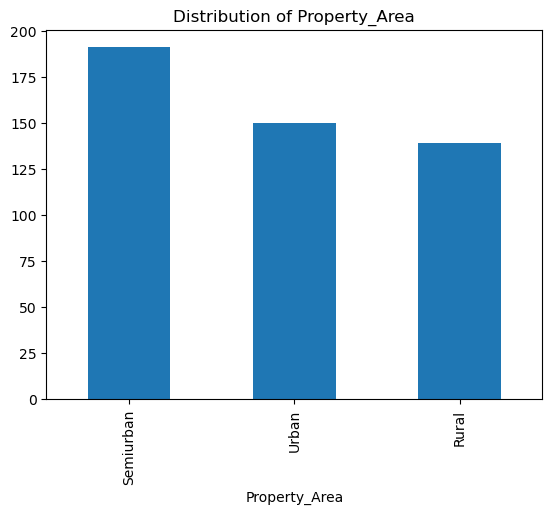

In [129]:
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_columns:
    print(data[col].value_counts())
    data[col].value_counts().plot(kind='bar', title=f'Distribution of {col}')
    plt.show()


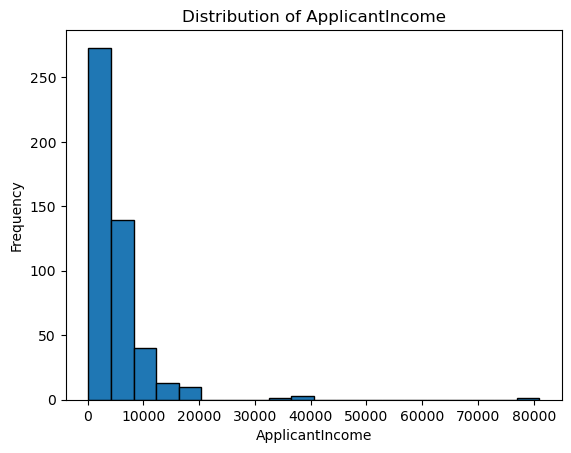

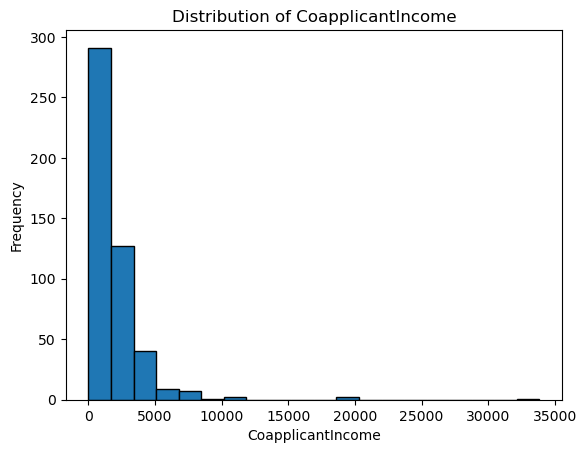

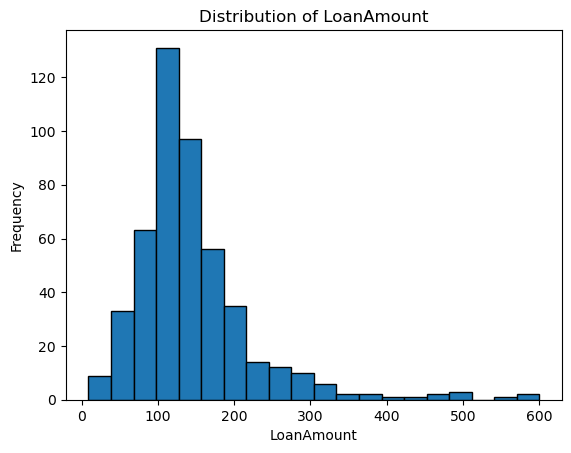

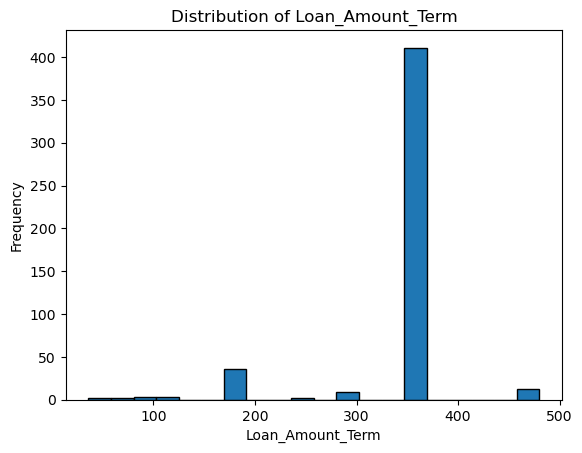

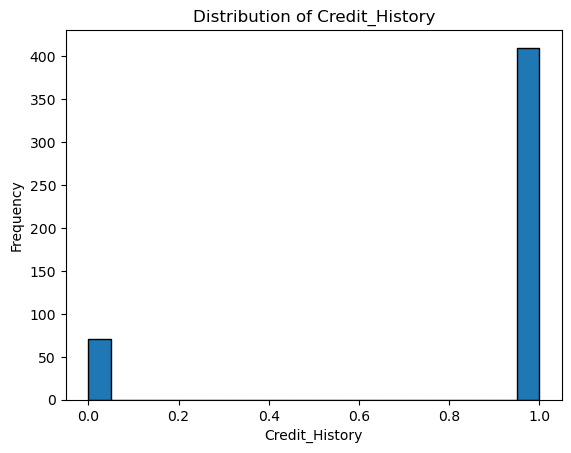

In [130]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in numerical_columns:
    data[col].hist(bins=20, grid=False, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


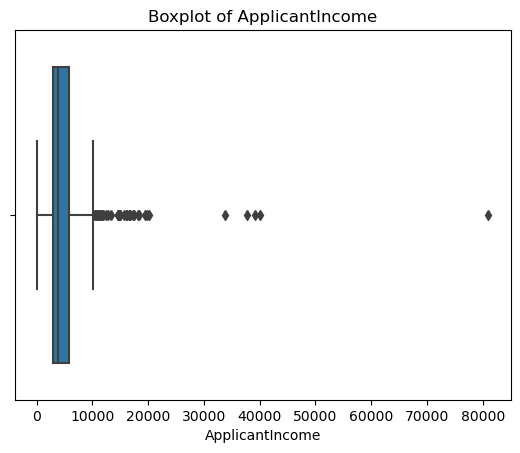

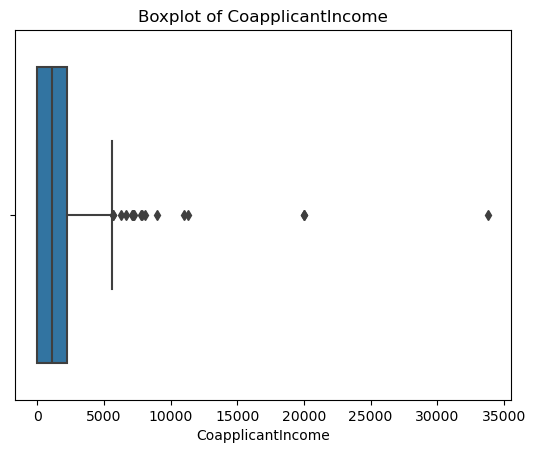

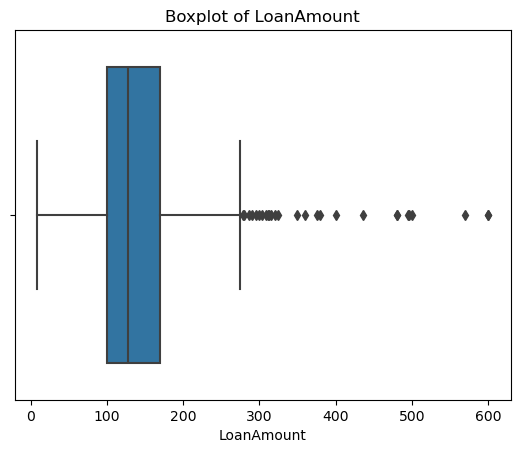

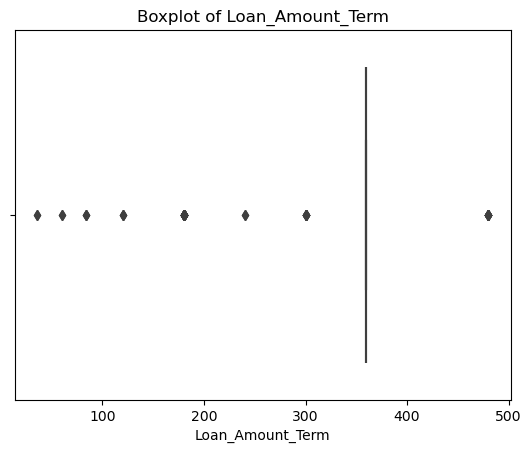

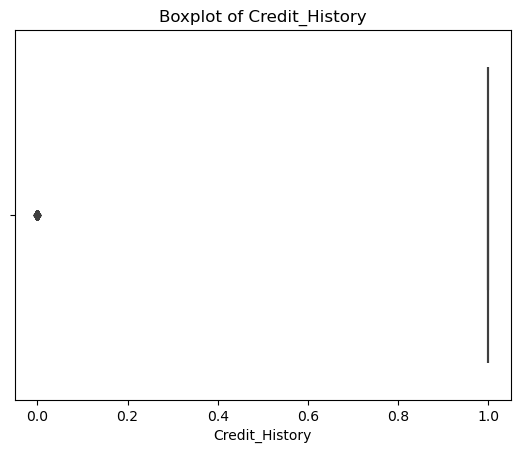

In [131]:
for col in numerical_columns:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# STEP #4: CLEANING DATASET & PRE-PROCESSING

In [132]:
data['Gender']= data['Gender'].map({'Male':0,'Female':1})
data['Married']= data['Married'].map({'No':0,'Yes':1})
data['Loan_Status']= data['Loan_Status'].map({'N':0,'Y':1})

data = data.drop('Loan_ID', axis=1)


In [133]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,0,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,0,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,0,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 48.8+ KB


In [135]:
columns_to_scale = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

scaler = StandardScaler()

data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,Graduate,No,-0.137970,-0.027952,-0.208089,360.0,1.0,Rural,0
2,0,1,0,Graduate,Yes,-0.417536,-0.604633,-0.979001,360.0,1.0,Urban,1
3,0,1,0,Not Graduate,No,-0.491180,0.297100,-0.307562,360.0,1.0,Urban,1
4,0,0,0,Graduate,No,0.112280,-0.604633,-0.046446,360.0,1.0,Urban,1
5,0,1,2,Graduate,Yes,0.009319,0.999978,1.520245,360.0,1.0,Urban,1


# STEP #5: TRAIN-TEST SPLIT

In [136]:
from sklearn.model_selection import train_test_split

X_final = data[['Gender', 'Married', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]
y_final = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2)


In [137]:
X_train.shape

(384, 6)

In [138]:
y_train.shape

(384,)

In [139]:
X_test.shape

(96, 6)

In [140]:
y_test.shape

(96,)

# STEP #6: TRAINING DATASET

In [141]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression()

In [142]:
from sklearn.metrics import r2_score

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared value of the model:", r2)

R-squared value of the model: 0.26316653394981027


In [143]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

# STEP#7: EVALUATING THE MODEL

In [144]:
from sklearn.metrics import classification_report, confusion_matrix


<Axes: >

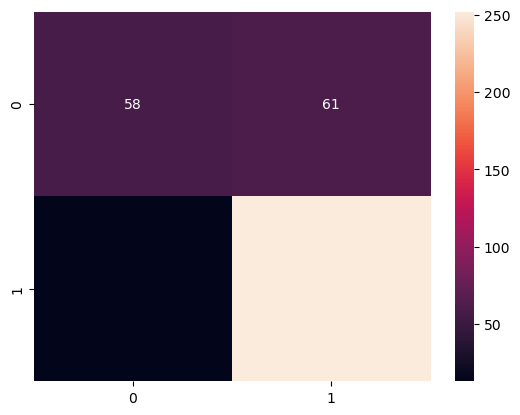

In [145]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

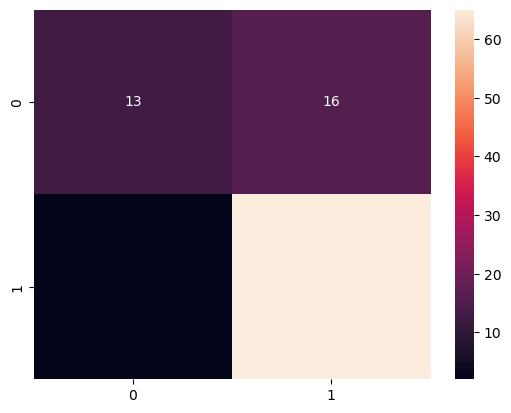

In [146]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [147]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.45      0.59        29
           1       0.80      0.97      0.88        67

    accuracy                           0.81        96
   macro avg       0.83      0.71      0.73        96
weighted avg       0.82      0.81      0.79        96



# STEP#8: SAVING THE MODEL

In [148]:
import pickle
pickle_out = open("model.pkl", mode = "wb")
pickle.dump(NB_classifier, pickle_out)
pickle_out.close()

In [149]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)